In [1]:
import random
import numpy as np
from IPython import display
import time
import math 
from cmath import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x1_list = np.random.uniform(-0.5,0.5,50)
x2_list = np.random.uniform(-0.5,0.5,50)
t = np.zeros((50),dtype=int)
for i in range(50):
    r = random.uniform(9,16)
    x_1 = random.uniform(-(sqrt(r)),abs(sqrt(r))).real
    if(i%2 == 0):
      x_2 = (sqrt(r - (x_1)**2)).real
    else:
      x_2 = -(sqrt(r - (x_1)**2)).real
    x1_list=np.append(x1_list,x_1)
    x2_list=np.append(x2_list,x_2)
    t=np.append(t,1)

In [3]:
x1=np.array(x1_list)
#print(x1)
x2=np.array(x2_list)
#print(x2)
x3=np.ones((100),dtype=int)
x4=np.column_stack((x1,x2))
x=np.column_stack((x4,x3))
# print(x)
# print(len(t))

In [4]:
x.shape

(100, 3)

In [5]:
n = int(input("1st layer neuron"))
m = int(input("2nd layer neuron"))

ValueError: invalid literal for int() with base 10: ''

In [ ]:
#define weights
weightOne=np.random.uniform(-2,2,[3,n])  
weightHiddenLayer=np.random.uniform(-2,2,[n,m])
weightOutputLayer=np.random.uniform(-2,2,[m])

#biases for each input
biasInput=np.random.uniform(-2.0,2,n)
biasHiddenWeight=np.random.uniform(-2.0,2,m)
biasOutput=np.random.uniform(-2.0,2,1)

#print weights and biases
# print(weightOne)
# print(weightHiddenLayer)
# print(weightOutputLayer)
# print(biasInput)
# print(biasHiddenWeight)
# print(biasOutput)




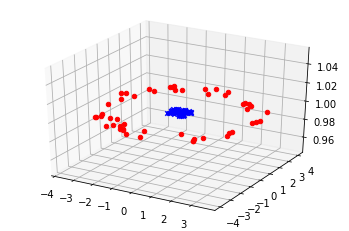

In [ ]:
fig = plt.figure()
%matplotlib inline
ax = plt.axes(projection="3d")

for i in range(100):
  if t[i]>0:
        ax.scatter3D(x[i][0], x[i][1], x[i][2], marker='o',  c='r');
            
  else:
        ax.scatter3D(x[i][0], x[i][1], x[i][2], marker='x',  c='b');



In [ ]:
#defination for sigmoid
def sigmoid(z):
    #-z > np.log(np.finfo(type(z)).max):
#     if (z >= 0):
#         return 1.0/(1+np.exp(-z))   
#     else:
#         return np.exp(inx)/(1+np.exp(inx))
    s=1/(1+np.exp(-z))
    return s

#Derivative of sigmoid
def sigmoid_p(z):
    return z*(1-z)

#define learning_rate
learning_rate=0.5
e_list = []


In [ ]:
while True:
  total_error=0
  output = []
  for i in range(100):      
        #converting ip with weights and bias (input layer)
        uLayer=(np.dot(x[i],weightOne))+biasInput
        # print(uLayer.shape)
        uActivation=sigmoid(uLayer)
        zLayer=np.dot(uActivation,weightHiddenLayer) + biasHiddenWeight
        # print(zLayer.shape)
        zActivation=sigmoid(zLayer)
        # print(weightOutputLayer.shape)
        OutputLayer=np.dot(zActivation,weightOutputLayer) + biasOutput
        # print(OutputLayer.shape)
        oActivation=sigmoid(OutputLayer)
        error=(t[i]-oActivation)**2 
        # print(error.shape)
        output.append(oActivation)
        derror=(t[i]-oActivation)
        changedWOL = np.multiply((learning_rate * derror * oActivation * (1-oActivation)) , zActivation)
        # print(changedWOL.shape)
        # #changedWOL = learning_rate * derror * oActivation * (1-oActivation) * zActivation
        # #print(changedWOL)
        changedbiasO = learning_rate * derror * oActivation * (1-oActivation)
        # print(changedbiasO.shape)
        weightOutputLayer = weightOutputLayer + changedWOL
        biasOutput = biasOutput + changedbiasO
        sum=(learning_rate * derror * oActivation * (1-oActivation))
        sum1=np.sum(sum * weightOutputLayer)
        # print(sum1.shape)
        changedbiasH = sum1 * zActivation * (1-zActivation)
        # print(np.array([sum1 * zActivation * (1-zActivation)]).shape)
        changedWHL = np.dot(np.array([sum1 * zActivation * (1-zActivation)]).T, np.array([uActivation]))
        # print(changedWHL.shape)
        weightHiddenLayer=weightHiddenLayer + changedWHL.T
        biasHiddenWeight = biasHiddenWeight + changedbiasH
        sum2=np.sum(sum1 * weightHiddenLayer)
        # print(np.array([sum2 * uActivation * (1-uActivation)]).shape)
        changedWIL = np.dot(np.array([sum2 * uActivation * (1-uActivation)]).T, np.array([x[i]]))
        # print(changedWIL.shape)
        changedbiasI =sum2 * uActivation * (1-uActivation)
        weightOne=weightOne + changedWIL.T
        biasInput = biasInput + changedbiasI
        total_error=total_error+error
        # #print("total error:",total_error)
        
  e_list.append(total_error)
  print(total_error)
  if (total_error < 0.01):
    break

[11.54889587]
[12.72873459]
[11.36587461]
[8.54519303]
[6.2089653]
[4.35823761]
[3.34213462]
[1.79931032]
[1.12364088]
[0.73266836]
[0.55049691]
[0.4450692]
[0.39746818]
[0.30574511]
[0.26565425]
[0.23362556]
[0.20763667]
[0.18429128]
[0.16306717]
[0.14805659]
[0.13579939]
[0.12543316]
[0.11650415]
[0.10871969]
[0.10187008]
[0.09579671]
[0.09037571]
[0.08550819]
[0.08111353]
[0.07712388]
[0.07347746]
[0.07010343]
[0.06705886]
[0.19006702]
[0.20557267]
[0.14593547]
[0.12393254]
[0.10984198]
[0.09895954]
[0.09024587]
[0.08310337]
[0.0771403]
[0.07208545]
[0.0677447]
[0.06397543]
[0.06067066]
[0.05774861]
[0.05514574]
[0.05281198]
[0.05070731]
[0.04879942]
[0.04706189]
[0.04547295]
[0.04401447]
[0.04267126]
[0.04143048]
[0.0402812]
[0.03921406]
[0.03822102]
[0.0372951]
[0.03643026]
[0.0356212]
[0.03486329]
[0.03415243]
[0.03348505]
[0.03285793]
[0.03226826]
[0.03171352]
[0.03119147]
[0.03070011]
[0.03023765]
[0.02980251]
[0.02939325]
[0.02900862]
[0.02864747]
[0.02830882]
[0.02799177]
[0.

In [ ]:
for i in range(100):
  print(output[i] , i)

[0.01226792] 0
[0.01227085] 1
[0.0123088] 2
[0.01240332] 3
[0.01231292] 4
[0.01233645] 5
[0.01252918] 6
[0.01225902] 7
[0.01227245] 8
[0.01232608] 9
[0.01243914] 10
[0.01226563] 11
[0.01229251] 12
[0.01225884] 13
[0.0122756] 14
[0.01225893] 15
[0.01227778] 16
[0.01224133] 17
[0.01224504] 18
[0.01226806] 19
[0.0130861] 20
[0.01248371] 21
[0.01223607] 22
[0.01237663] 23
[0.01227342] 24
[0.01224057] 25
[0.01239778] 26
[0.01225156] 27
[0.0122356] 28
[0.01226706] 29
[0.01230134] 30
[0.01233605] 31
[0.01222432] 32
[0.01253355] 33
[0.01221722] 34
[0.01225184] 35
[0.01225752] 36
[0.01222431] 37
[0.01228902] 38
[0.01227563] 39
[0.01230735] 40
[0.01220949] 41
[0.01228225] 42
[0.01221742] 43
[0.01223832] 44
[0.0122341] 45
[0.01221655] 46
[0.01220586] 47
[0.01221096] 48
[0.01228121] 49
[0.9915135] 50
[0.99088612] 51
[0.99827999] 52
[0.99093679] 53
[0.99836077] 54
[0.9908965] 55
[0.99873493] 56
[0.99263028] 57
[0.99836151] 58
[0.99090154] 59
[0.99823527] 60
[0.99263447] 61
[0.99836226] 62
[0.991258

[array([11.54889587]), array([12.72873459]), array([11.36587461]), array([8.54519303]), array([6.2089653]), array([4.35823761]), array([3.34213462]), array([1.79931032]), array([1.12364088]), array([0.73266836]), array([0.55049691]), array([0.4450692]), array([0.39746818]), array([0.30574511]), array([0.26565425]), array([0.23362556]), array([0.20763667]), array([0.18429128]), array([0.16306717]), array([0.14805659]), array([0.13579939]), array([0.12543316]), array([0.11650415]), array([0.10871969]), array([0.10187008]), array([0.09579671]), array([0.09037571]), array([0.08550819]), array([0.08111353]), array([0.07712388]), array([0.07347746]), array([0.07010343]), array([0.06705886]), array([0.19006702]), array([0.20557267]), array([0.14593547]), array([0.12393254]), array([0.10984198]), array([0.09895954]), array([0.09024587]), array([0.08310337]), array([0.0771403]), array([0.07208545]), array([0.0677447]), array([0.06397543]), array([0.06067066]), array([0.05774861]), array([0.0551

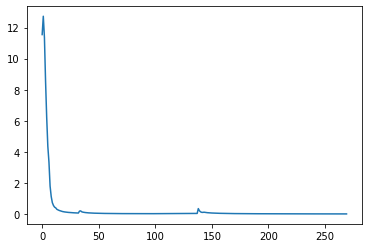

In [ ]:
print(e_list) 
plt.figure(2)
plt.plot(range(len(e_list)),e_list)
plt.show()

In [ ]:
len(e_list)

270

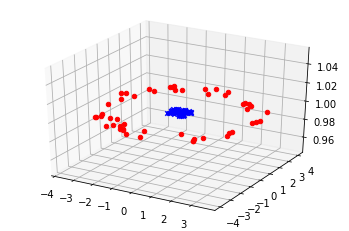

In [ ]:
fig = plt.figure()
%matplotlib inline
ax = plt.axes(projection="3d")

for i in range(100):      
        #converting ip with weights and bias (input layer)
        uLayer=(np.dot(x[i],weightOne))+biasInput
        # print(uLayer.shape)
        uActivation=sigmoid(uLayer)
        zLayer=np.dot(uActivation,weightHiddenLayer) + biasHiddenWeight
        # print(zLayer.shape)
        zActivation=sigmoid(zLayer)
        # print(weightOutputLayer.shape)
        OutputLayer=np.dot(zActivation,weightOutputLayer) + biasOutput
        # print(OutputLayer.shape)
        oActivation=sigmoid(OutputLayer)
        if oActivation>0.90:
          ax.scatter3D(x[i][0], x[i][1], x[i][2], marker='o',  c='r');
            
        else:
          ax.scatter3D(x[i][0], x[i][1], x[i][2], marker='x',  c='b');
plt.show()